In [78]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [79]:
print('x_train shape: ', x_train.shape)

x_train shape:  (60000, 28, 28)


In [80]:
print('y_train shape: ', y_train)

y_train shape:  [5 0 4 ... 5 6 8]


In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

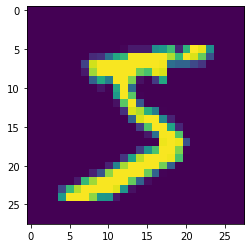

In [82]:
img = plt.imshow(x_train[0])

In [83]:
print("Label: ", y_train[0])

Label:  5


In [84]:
import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [85]:
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [96]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [97]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [98]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [99]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 100)               627300    
_________________________________________________________________
dense_28 (Dense)             (None, 10)                1010      
Total params: 628,630
Trainable params: 628,630
Non-trainable params: 0
_______________________________________________

In [100]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [101]:
hist = model.fit(x_train, y_train_one_hot, batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3557 - accuracy: 0.8905 - val_loss: 0.0781 - val_accuracy: 0.9785
Epoch 2/20
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0734 - accuracy: 0.9772 - val_loss: 0.0623 - val_accuracy: 0.9799
Epoch 3/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0451 - accuracy: 0.9866 - val_loss: 0.0520 - val_accuracy: 0.9848
Epoch 4/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0357 - accuracy: 0.9886 - val_loss: 0.0486 - val_accuracy: 0.9845
Epoch 5/20
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0277 - accuracy: 0.9912 - val_loss: 0.0471 - val_accuracy: 0.9857
Epoch 6/20
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0175 - accuracy: 0.9943 - val_loss: 0.0547 - val_accuracy: 0.9860
Epoch 7/20
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0180 - accuracy: 0.9942 - val_loss: 0.0487 -

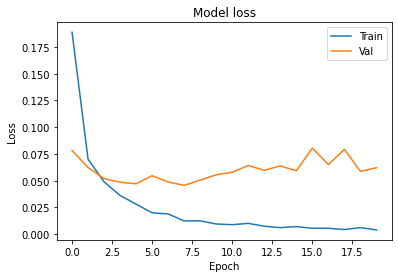

In [103]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [108]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 1s 4ms/step - loss: 0.0563 - accuracy: 0.9877


0.9876999855041504

In [138]:
model.save('first_model.h5')

In [157]:
test_img = plt.imread('five.png')

In [158]:
from skimage.transform import resize
test_img_resized = resize(test_img, (28, 28, 1))

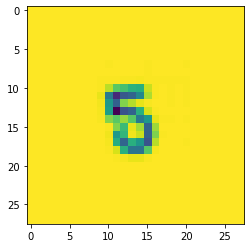

In [159]:
img = plt.imshow(test_img_resized)

In [160]:
import numpy as np
probabilities = model.predict(np.array( [test_img_resized,] ))

In [161]:
probabilities

array([[2.2527803e-07, 1.6854718e-06, 5.8256080e-03, 8.8719332e-07,
        1.1884250e-17, 9.2704552e-01, 6.6324309e-02, 4.7039866e-04,
        2.3807243e-07, 3.3105159e-04]], dtype=float32)

In [162]:
number_to_class = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: 5 -- Probability: 0.9270455
Second most likely class: 6 -- Probability: 0.06632431
Third most likely class: 2 -- Probability: 0.005825608
Fourth most likely class: 7 -- Probability: 0.00047039866
Fifth most likely class: 9 -- Probability: 0.0003310516
